# Interactias Geo Selected Network

One way of examining the impact of invasive species is to look at all their interactions and the interations those organisms have with each other. This full interaction network gives you a good idea whether a species might be a "keystone" species 

The networks create from all interacting species globally can be misleading, because not all members of the network live in one place. The next step is to filter the species in the network geographically, just to find the interactions that might occur in an area.

I will harvest species interactions data from GLOBI (https://www.globalbioticinteractions.org/) to discover the species that interact with an invasive species.
I will then harvest all the interactions for those species to create two tiers of interactions.
I will then count all the occurences of these in species in GBIF for an area.
I will then create a network diagram to visualize this.

This notebook takes considerable insperation and code from Yikang Li's project on GLoBI (https://curiositydata.org/part1_globi_access/).

In [51]:
import sys
print(sys.version)

#Python 3.7.4 (default, Aug 9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
#pygbif 0.3.0

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [52]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pygbif import species
from pygbif import occurrences as occ

### Setting up some parameters

In [53]:
# There is no point accepting all the species that have more than one record.
# There are too many casual records of plants and biirds
thresholdForOccNum = 50

In [54]:
## Define the country of interest
country  = 'BE' #Belgium

### Define the key taxon for the notebook for which to find all interactions


In [55]:
#taxon = "Oxalis corniculata"
#taxon = "Oxalis pes-caprae"
#taxon = "Lantanophaga pusillidactyla"
#taxon = "Lantana camara"
#taxon = "Cirsium vulgare"
taxon = "Procyon lotor" # raccoon
#taxon = "not exist"
#taxon = "Sciurus carolinensis" # Eastern grey squirrel

## Load the GLoBI data

The current snapshot of GLoBI was taken on 2019-11-05 from https://depot.globalbioticinteractions.org/snapshot/target/data/tsv/interactions.tsv.gz


In [6]:
# This takes a few minutes to load in.
# the low_memory=False property will get rid of a warning, but will not help if there is really no memory left
data = pd.read_csv('C://Users//quentin//Documents//interactias//interactias//data//interactions.tsv', delimiter='\t', encoding='utf-8', low_memory=False)
len(data)

3878740

In [56]:
# Take a little look at the data to make sure it makes sense
data.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | OTT:133330 | IRMNG:11733708 | N...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
3,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
4,EOL:12001243,EOL:12001243 | WD:Q13393577 | OTT:550603 | WOR...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,...,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z


## Drop duplicates

This line gets rid of duplicate interations. I currently can't see a reason to keep them, but this perhaps should be checked. 
Some more common interactions might have more support in the literature and therefore more records. Deduplicating them tends to equal out rare interactions with common ones.

In [57]:
data.drop_duplicates(['sourceTaxonName', 'interactionTypeName', 'targetTaxonName'], inplace = True)

In [58]:
## Check how many rows are left
len(data)

1103723

## Remove ranks that are not species
Many entries in GLoBI are non-specific interations at a high taxonomic level. For example, roses are visited by bees.
I have chossen to remove these interactions from the study, at least preliminarly

In [59]:
data.drop(data[data['sourceTaxonRank'] != 'species'].index, inplace = True)
data.drop(data[data['targetTaxonRank'] != 'species'].index, inplace = True)

In [60]:
## Check how many rows are left
len(data)

536018

## Remove "interactsWith"
There are many vague interactions with the term interactsWith. These aren't really that useful, because it could be any kind of interaction, positive or negative, direct or indirect.

In [61]:
data = data[data.interactionTypeName != 'interactsWith']

len(data)

394573

## Check to see if the taxon exits in GBIF

In [62]:
try:
    #NOTE: The function method name_suggest has a different behavior with regards to the gender of Latin names to name_backbone
    # If name_backbone is given a name in one gender it can still return the best match from the GBIF backbone if that
    # name is spelled as if it was another gender.
    #key = species.name_suggest(q=taxon, limit = 1)
    match = species.name_backbone(name=taxon, limit = 1)
    #print(key)
    
    # if there is no match this is returned form .name_backbone {'confidence': 100, 'matchType': 'NONE', 'synonym': False}
    if match['matchType'] == 'NONE':
        raise ValueError("TAXON NOT FOUND ON GBIF!")
    else:
        key = match['usageKey']
except ValueError as ve:
    print(ve)
    exit(1)




In [124]:

print('The taxon to be studied is ' + match['scientificName'])

The taxon to be studied is Procyon lotor (Linnaeus, 1758)
{'usageKey': 5218786, 'scientificName': 'Procyon lotor (Linnaeus, 1758)', 'canonicalName': 'Procyon lotor', 'rank': 'SPECIES', 'status': 'ACCEPTED', 'confidence': 98, 'matchType': 'EXACT', 'kingdom': 'Animalia', 'phylum': 'Chordata', 'order': 'Carnivora', 'family': 'Procyonidae', 'genus': 'Procyon', 'species': 'Procyon lotor', 'kingdomKey': 1, 'phylumKey': 44, 'classKey': 359, 'orderKey': 732, 'familyKey': 5311, 'genusKey': 2433592, 'speciesKey': 5218786, 'synonym': False, 'class': 'Mammalia'}


In [64]:
# What are all the types of interactions involving taxon as source taxon?
data[data['sourceTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'preysOn'], dtype=object)

In [65]:
# What are all the types of interactions involving taxon as target taxon?
data[data['targetTaxonName'] == taxon]['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'pathogenOf', 'ectoParasiteOf', 'hasHost',
       'endoparasiteOf', 'preysOn'], dtype=object)

How many taxon sources do I have?

In [66]:
len(data[data['sourceTaxonName'] == taxon])

88

How many taxon targets do I have?

In [67]:
len(data[data['targetTaxonName'] == taxon])

245

Gather together all the data where the target is the taxon in question.

In [68]:
# What are the columns of this dataset?
data.columns

Index(['sourceTaxonId', 'sourceTaxonIds', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonPathNames', 'sourceTaxonPathIds',
       'sourceTaxonPathRankNames', 'sourceTaxonSpeciesName',
       'sourceTaxonSpeciesId', 'sourceTaxonGenusName', 'sourceTaxonGenusId',
       'sourceTaxonFamilyName', 'sourceTaxonFamilyId', 'sourceTaxonOrderName',
       'sourceTaxonOrderId', 'sourceTaxonClassName', 'sourceTaxonClassId',
       'sourceTaxonPhylumName', 'sourceTaxonPhylumId',
       'sourceTaxonKingdomName', 'sourceTaxonKingdomId', 'sourceId',
       'sourceOccurrenceId', 'sourceCatalogNumber', 'sourceBasisOfRecordId',
       'sourceBasisOfRecordName', 'sourceLifeStageId', 'sourceLifeStageName',
       'sourceBodyPartId', 'sourceBodyPartName', 'sourcePhysiologicalStateId',
       'sourcePhysiologicalStateName', 'interactionTypeName',
       'interactionTypeId', 'targetTaxonId', 'targetTaxonIds',
       'targetTaxonName', 'targetTaxonRank', 'targetTaxonPathNames',
       'targetTaxonPath

## Get the primary interation data for the species in question

In [69]:
    interactDataTaxon = data[data['targetTaxonName'] == taxon]
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == taxon])

In [70]:
interactDataTaxon.count()

sourceTaxonId                333
sourceTaxonIds               333
sourceTaxonName              333
sourceTaxonRank              333
sourceTaxonPathNames         333
                            ... 
sourceCitation               333
sourceNamespace              333
sourceArchiveURI             333
sourceDOI                     55
sourceLastSeenAtUnixEpoch    333
Length: 80, dtype: int64

## Get a list of all the primary interacting species

In [71]:
interactingTaxa = pd.DataFrame(interactDataTaxon['sourceTaxonName'].append(interactDataTaxon['targetTaxonName']).unique())

In [72]:
interactingTaxa

,0
0,Bubo virginianus
1,Cathartes aura
2,Coragyps atratus
3,Aquila chrysaetos
4,Haliaeetus leucocephalus
...,...
289,Cloacitrema michiganense
290,Himasthla rhigedana
291,Parorchis acanthus
292,Pygidiopsoides spindalis


## Get all the secondary interactions

In [73]:
for name in interactingTaxa[0]:
    interactDataTaxon = interactDataTaxon.append(data[data['targetTaxonName'] == name])
    interactDataTaxon = interactDataTaxon.append(data[data['sourceTaxonName'] == name])

In [75]:
interactDataTaxon.tail()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,...,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
3215754,EOL_V2:474884,EOL_V2:474884 | ITIS:57130 | OTT:3666059 | WD:...,Phocitremoides ovale,species,Animalia | Platyhelminthes | Trematoda | Plagi...,EOL:1 | EOL:2884 | EOL:2894 | EOL_V2:2976 | EO...,kingdom | phylum | class | order | family | ge...,Phocitremoides ovale,EOL_V2:474884,Phocitremoides,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z
3215938,EOL_V2:474884,EOL_V2:474884 | ITIS:57130 | OTT:3666059 | WD:...,Phocitremoides ovale,species,Animalia | Platyhelminthes | Trematoda | Plagi...,EOL:1 | EOL:2884 | EOL:2894 | EOL_V2:2976 | EO...,kingdom | phylum | class | order | family | ge...,Phocitremoides ovale,EOL_V2:474884,Phocitremoides,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z
3216007,EOL_V2:474884,EOL_V2:474884 | ITIS:57130 | OTT:3666059 | WD:...,Phocitremoides ovale,species,Animalia | Platyhelminthes | Trematoda | Plagi...,EOL:1 | EOL:2884 | EOL:2894 | EOL_V2:2976 | EO...,kingdom | phylum | class | order | family | ge...,Phocitremoides ovale,EOL_V2:474884,Phocitremoides,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z
3216065,EOL_V2:474884,EOL_V2:474884 | ITIS:57130 | OTT:3666059 | WD:...,Phocitremoides ovale,species,Animalia | Platyhelminthes | Trematoda | Plagi...,EOL:1 | EOL:2884 | EOL:2894 | EOL_V2:2976 | EO...,kingdom | phylum | class | order | family | ge...,Phocitremoides ovale,EOL_V2:474884,Phocitremoides,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z
3216073,EOL_V2:474884,EOL_V2:474884 | ITIS:57130 | OTT:3666059 | WD:...,Phocitremoides ovale,species,Animalia | Platyhelminthes | Trematoda | Plagi...,EOL:1 | EOL:2884 | EOL:2894 | EOL_V2:2976 | EO...,kingdom | phylum | class | order | family | ge...,Phocitremoides ovale,EOL_V2:474884,Phocitremoides,...,NaN,https://en.wiktionary.org/wiki/support,"Lafferty, K. D., Hechinger, R. F., Shaw, J. C....",10.1093/acprof:oso/9780198567080.001.0001,NaN,Sarah E Miller. 6/19/2015. Species association...,millerse/Carpinteria-Salt-Marsh-Web,https://zenodo.org/record/258225/files/millers...,10.5281/zenodo.258225,2019-11-03T00:05:13.726Z


In [76]:
    cleanInteractDataTaxon = interactDataTaxon[['sourceTaxonId', 'sourceTaxonName', 'sourceTaxonRank',
       'sourceTaxonFamilyName', 'interactionTypeName',
       'targetTaxonName','targetTaxonRank',
        ]].dropna(subset=['targetTaxonName','sourceTaxonName'])

In [77]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


In [78]:
# How many different sort of interaction do I have left?
# Checking out all the interaction types
cleanInteractDataTaxon['interactionTypeName'].unique()

array(['eats', 'parasiteOf', 'pathogenOf', 'ectoParasiteOf', 'hasHost',
       'endoparasiteOf', 'preysOn', 'symbiontOf', 'hasVector',
       'visitsFlowersOf', 'mutualistOf', 'livesInsideOf', 'visits',
       'commensalistOf', 'hasDispersalVector'], dtype=object)

In [79]:
cleanInteractDataTaxon.groupby(cleanInteractDataTaxon['interactionTypeName']).size().sort_values(ascending = False)

interactionTypeName
parasiteOf            4348
eats                  2657
hasHost               2165
preysOn               1181
endoparasiteOf         724
pathogenOf             663
ectoParasiteOf         189
symbiontOf              59
mutualistOf              9
visitsFlowersOf          6
hasVector                3
livesInsideOf            2
visits                   1
hasDispersalVector       1
commensalistOf           1
dtype: int64

In [80]:
len(cleanInteractDataTaxon)

12009

In [81]:
cleanInteractDataTaxon.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


## Create a file with all the nodes and their attributes

In [82]:
# Get the source nodes
nodes = cleanInteractDataTaxon.drop_duplicates(subset=['sourceTaxonName'])

In [83]:
# Get the target nodes
nodes = nodes.append(cleanInteractDataTaxon.drop_duplicates(subset=['targetTaxonName']))

In [85]:
nodes.head()

,sourceTaxonId,sourceTaxonName,sourceTaxonRank,sourceTaxonFamilyName,interactionTypeName,targetTaxonName,targetTaxonRank
198115,EOL_V2:914958,Bubo virginianus,species,Strigidae,eats,Procyon lotor,species
209176,EOL_V2:1049010,Cathartes aura,species,Cathartidae,eats,Procyon lotor,species
209291,ITIS:175272,Coragyps atratus,species,Cathartidae,eats,Procyon lotor,species
214225,EOL_V2:1049119,Aquila chrysaetos,species,Accipitridae,eats,Procyon lotor,species
216493,EOL_V2:1049121,Haliaeetus leucocephalus,species,Accipitridae,eats,Procyon lotor,species


In [86]:
interactingTaxa.head(3)


,0
0,Bubo virginianus
1,Cathartes aura
2,Coragyps atratus


### This function takes a name string and checks on GBIF to see if the name exists there.

In [136]:
def speciesExistsInGBIF(name, rank):
    try:
        # Uses the dataset key for the GBIF backbone taxonomy
        #key = species.name_suggest(q=name, rank=rank, datasetKey = "d7dddbf4-2cf0-4f39-9b2a-bb099caae36c", limit = 1)
        match = species.name_backbone(name=name, rank=rank, limit = 1)
        #print(key)

        # if there is no match this is returned from .name_backbone {'confidence': 100, 'matchType': 'NONE', 'synonym': False}
        if match['matchType'] == 'NONE':
            return False
        else:
            return match
    except ValueError as ve:
        print(ve)
        exit(1)

### Check that the species in question is actually found on GBIF

In [137]:
if(speciesExistsInGBIF(taxon, "species") == False):
    print("##### {0} has not been found on GBIF #####".format(taxon))

### Check to see which taxa in the interaction network are found in GBIF and list those ones that are not

In [138]:
taxaNotFound = []
taxaFound = []

print('Taxa from GLoBI, but not found in GBIF')
for name in interactingTaxa.iterrows():
    GBIFName = speciesExistsInGBIF(name[1], "species")
    if GBIFName == False:
        print(name[1][0])
        taxaNotFound.append({'name': name[1][0]})
    else:
        taxaFound.append(GBIFName)
    
    #print(name[1])

# Convert to a Pandas dataframe
taxaFound = pd.DataFrame(taxaFound)

Taxa from GLoBI, but not found in GBIF
Trypanosoma cruzi
Capillaria putorii
Alaria taxideae
Orthopoxvirus
Raccoon-associated polyomavirus 2
Parvovirus
Rabies virus
Canine distemper virus
Feline panleukopenia virus


In [139]:
len(taxaFound)

285

In [142]:
taxaFound.head(2)

,usageKey,scientificName,canonicalName,rank,status,confidence,matchType,kingdom,phylum,order,...,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,synonym,class,acceptedUsageKey
0,5959118,"Bubo virginianus (Gmelin, 1788)",Bubo virginianus,SPECIES,ACCEPTED,98,EXACT,Animalia,Chordata,Strigiformes,...,1,44.0,212.0,1450.0,9348,5959091.0,5959118.0,False,Aves,NaN
1,2481930,"Cathartes aura (Linnaeus, 1758)",Cathartes aura,SPECIES,ACCEPTED,98,EXACT,Animalia,Chordata,Accipitriformes,...,1,44.0,212.0,7191147.0,3242141,2481927.0,2481930.0,False,Aves,NaN


### This function takes a GBIF species key and counts how many occurences exist.

In [143]:
def speciesCountInGBIF(key, country):
    try:
        return occ.count(taxonKey=key, country = country)
        #return occ.count(taxonKey=key, country = country, basisOfRecord = "HUMAN_OBSERVATION")
    except ValueError as ve:
        print(ve)
        exit(1)

### Loop over all the taxa that are in the interaction network and are in GBIF to find the ones that have been found in the country

In [153]:
taxaFoundInCountry = []

for GBIFtaxon in taxaFound.iterrows():
    #print('{0} found {1} time in Belgium.'.format(GBIFtaxon,speciesCountInGBIF(GBIFtaxon[0]['usageKey'],country)))
    GBIFOccCount = speciesCountInGBIF(GBIFtaxon[1]['usageKey'],country)
    if GBIFOccCount > thresholdForOccNum: # The threshold for observations is not greater than one, due to all the casual records
        taxaFoundInCountry.append({'key': GBIFtaxon[1]['usageKey'], 'species': GBIFtaxon[1]['species'], 'count': GBIFOccCount})
        

In [154]:
# Convert to a Pandas dataframe
taxaFoundInCountry = pd.DataFrame(taxaFoundInCountry)
    

In [155]:
print("The number of species left in the network is {0}".format(len(taxaFoundInCountry)))

The number of species left in the network is 18


In [156]:
taxaFoundInCountry

,key,species,count
0,9701185,Salmonella enterica,57
1,3223154,Pseudomonas aeruginosa,72
2,5219173,Canis lupus,187
3,5219243,Vulpes vulpes,348
4,5218786,Procyon lotor,2741
5,9761484,Anas platyrhynchos,329592
6,5217160,Bufo bufo,1092
7,5231190,Passer domesticus,135065
8,2480726,Pandion haliaetus,13457
9,2498387,Aix sponsa,2587


## Drawing a network of the interactions

Now that I have a list of all the species in the country I can use this as my nodes list for the network diagram.

In [157]:
#networkx seems to be a leading network tool in Python
import networkx as nx
import matplotlib.pyplot as plt

In [158]:
# Create graphic object
G = nx.DiGraph()

In [159]:
# Match colours to interactions to distinguish them on the graph
colorInteractions = {'interaction':['pollinates', 'mutualistOf', 'eats', 'visitsFlowersOf', 'hasHost', 'parasiteOf', 'pathogenOf'],
        'colour':['r', 'g', 'b', 'y', 'm', 'w', 'c']}  

colorInteractionsDf = pd.DataFrame(colorInteractions)

len(list(G.nodes))

0

In [160]:
# iterate over rows with iterrows()
for index, row in taxaFoundInCountry.iterrows():
     # access data using column names
    print(row['species'], row['count'], row['key'])
    G.add_node(row['species'])
    #G.add_node(row['targetTaxonName'])
    #print(colorInteractionsDf[colorInteractionsDf.interaction == row['interactionTypeName']].iloc[:,1])
    #G.add_edge(row['targetTaxonName'], row['sourceTaxonName'], label = row['interactionTypeName'])
    for edge in cleanInteractDataTaxon.iterrows():
        if row['species'] == edge[1]['sourceTaxonName']:
            print(edge[1]['sourceTaxonName'], edge[1]['targetTaxonName'],row['species'])
            for index2, row2 in taxaFoundInCountry.iterrows():
                #print(row2['species'])
                if row2['species'] == edge[1]['targetTaxonName']: 
                    print(edge[1]['sourceTaxonName'],row2['species'])
                    G.add_edge(row2['species'], edge[1]['sourceTaxonName'], label = edge[1]['interactionTypeName'])
            #if row['species'] == edge[1]['sourceTaxonName']:
            #    #print(edge[1]['sourceTaxonName'],row['species'])
            #    G.add_edge(edge[1]['targetTaxonName'], edge[1]['sourceTaxonName'], label = edge[1]['interactionTypeName'])

Salmonella enterica 57 9701185
Salmonella enterica Procyon lotor Salmonella enterica
Salmonella enterica Procyon lotor
Salmonella enterica Mus musculus Salmonella enterica
Salmonella enterica Gallus gallus Salmonella enterica
Salmonella enterica Galleria mellonella Salmonella enterica
Salmonella enterica Homo sapiens Salmonella enterica
Salmonella enterica Danio rerio Salmonella enterica
Salmonella enterica Dictyostelium discoideum Salmonella enterica
Salmonella enterica Medicago sativa Salmonella enterica
Salmonella enterica Caenorhabditis elegans Salmonella enterica
Salmonella enterica Macrosteles quadrilineatus Salmonella enterica
Salmonella enterica Sus scrofa Salmonella enterica
Salmonella enterica Vulpes vulpes Salmonella enterica
Salmonella enterica Vulpes vulpes
Salmonella enterica Rupicapra rupicapra Salmonella enterica
Salmonella enterica Procyon lotor Salmonella enterica
Salmonella enterica Procyon lotor
Salmonella enterica Papio ursinus Salmonella enterica
Salmonella enteri

Pseudomonas aeruginosa Procyon lotor Pseudomonas aeruginosa
Pseudomonas aeruginosa Procyon lotor
Canis lupus 187 5219173
Canis lupus Procyon lotor Canis lupus
Canis lupus Procyon lotor
Canis lupus Canis lupus Canis lupus
Canis lupus Canis lupus
Canis lupus Phoca vitulina Canis lupus
Canis lupus Ovibos moschatus Canis lupus
Canis lupus Lepus arcticus Canis lupus
Canis lupus Erignathus barbatus Canis lupus
Canis lupus Bison bison Canis lupus
Canis lupus Alces alces Canis lupus
Canis lupus Amblysomus hottentotus Canis lupus
Canis lupus Nestor meridionalis Canis lupus
Canis lupus Tetracerus quadricornis Canis lupus
Canis lupus Procapra gutturosa Canis lupus
Canis lupus Hemitragus hylocrius Canis lupus
Canis lupus Capra ibex Canis lupus
Canis lupus Capra cylindricornis Canis lupus
Canis lupus Equus kiang Canis lupus
Canis lupus Equus hemionus Canis lupus
Canis lupus Castor canadensis Canis lupus
Canis lupus Sciurus carolinensis Canis lupus
Canis lupus Ursus americanus Canis lupus
Canis lupu

Procyon lotor Mesostephanus appendiculatoides Procyon lotor
Procyon lotor Stictodora hancocki Procyon lotor
Procyon lotor Alligator mississippiensis Procyon lotor
Procyon lotor Probolocoryphe uca Procyon lotor
Procyon lotor Astrocaryum mexicanum Procyon lotor
Procyon lotor Sabal palmetto Procyon lotor
Procyon lotor Anas platyrhynchos Procyon lotor
Procyon lotor Anas platyrhynchos
Procyon lotor Fulica americana Procyon lotor
Procyon lotor Atherinops affinis Procyon lotor
Procyon lotor Uca crenulata Procyon lotor
Procyon lotor Pachygrapsus crassipes Procyon lotor
Procyon lotor Hemigrapsus oregonensis Procyon lotor
Procyon lotor Prunus ilicifolia Procyon lotor
Procyon lotor Bufo bufo Procyon lotor
Procyon lotor Bufo bufo
Procyon lotor Bufo bufo Procyon lotor
Procyon lotor Bufo bufo
Procyon lotor Passer domesticus Procyon lotor
Procyon lotor Passer domesticus
Procyon lotor Larus californicus Procyon lotor
Procyon lotor Glaucomys volans Procyon lotor
Procyon lotor Pandion haliaetus Procyon 

Anas platyrhynchos Profilicollis botulus Anas platyrhynchos
Anas platyrhynchos Culex tarsalis Anas platyrhynchos
Anas platyrhynchos Aedes taeniorhynchus Anas platyrhynchos
Anas platyrhynchos Anas platyrhynchos Anas platyrhynchos
Anas platyrhynchos Anas platyrhynchos
Anas platyrhynchos Myriophyllum sibiricum Anas platyrhynchos
Anas platyrhynchos Ceratophyllum demersum Anas platyrhynchos
Anas platyrhynchos Stuckenia pectinata Anas platyrhynchos
Anas platyrhynchos Sagittaria cuneata Anas platyrhynchos
Anas platyrhynchos Beckmannia syzigachne Anas platyrhynchos
Anas platyrhynchos Scolochloa festucacea Anas platyrhynchos
Anas platyrhynchos Lemna minor Anas platyrhynchos
Anas platyrhynchos Triticum aestivum Anas platyrhynchos
Anas platyrhynchos Echinochloa crus-galli Anas platyrhynchos
Anas platyrhynchos Potamogeton amplifolius Anas platyrhynchos
Anas platyrhynchos Brasenia schreberi Anas platyrhynchos
Anas platyrhynchos Potamogeton foliosus Anas platyrhynchos
Anas platyrhynchos Persicaria l

Aix sponsa 2587 2498387
Aix sponsa Aix sponsa Aix sponsa
Aix sponsa Aix sponsa
Aix sponsa Vitis cinerea Aix sponsa
Aix sponsa Viburnum prunifolium Aix sponsa
Aix sponsa Sassafras albidum Aix sponsa
Aix sponsa Liquidambar styraciflua Aix sponsa
Aix sponsa Lemna minuta Aix sponsa
Aix sponsa Glycine max Aix sponsa
Aix sponsa Forestiera acuminata Aix sponsa
Aix sponsa Cephalanthus occidentalis Aix sponsa
Aix sponsa Brasenia schreberi Aix sponsa
Aix sponsa Bidens frondosa Aix sponsa
Aix sponsa Triadenum walteri Aix sponsa
Aix sponsa Taxodium distichum Aix sponsa
Aix sponsa Vitis rotundifolia Aix sponsa
Aix sponsa Leersia oryzoides Aix sponsa
Aix sponsa Nymphaea odorata Aix sponsa
Aix sponsa Echinochloa walteri Aix sponsa
Aix sponsa Spirodela polyrrhiza Aix sponsa
Aix sponsa Scleria reticularis Aix sponsa
Aix sponsa Planera aquatica Aix sponsa
Aix sponsa Sagittaria graminea Aix sponsa
Aix sponsa Aix sponsa Aix sponsa
Aix sponsa Aix sponsa
Aix sponsa Lophodytes cucullatus Aix sponsa
Trachemys

Anas strepera Distichlis spicata Anas strepera
Anas strepera Ceratophyllum demersum Anas strepera
Anas strepera Myriophyllum spicatum Anas strepera
Anas strepera Ruppia maritima Anas strepera
Anas strepera Eleocharis parvula Anas strepera
Anas strepera Zannichellia palustris Anas strepera
Anas strepera Lemna minor Anas strepera
Anas strepera Stuckenia pectinata Anas strepera
Anas strepera Nyssa sylvatica Anas strepera
Anas strepera Echinochloa walteri Anas strepera
Anas strepera Cyperus esculentus Anas strepera
Anas strepera Cyperus odoratus Anas strepera
Anas strepera Cyperus erythrorrhizos Anas strepera
Anas strepera Persicaria punctata Anas strepera
Anas strepera Panicum dichotomiflorum Anas strepera
Anas strepera Lachnanthes caroliniana Anas strepera
Anas strepera Bolboschoenus robustus Anas strepera
Anas acuta 55769 2498112
Anas acuta Culex tarsalis Anas acuta
Anas acuta Aedes taeniorhynchus Anas acuta
Anas acuta Bolboschoenus maritimus Anas acuta
Anas acuta Glycine max Anas acuta

In [161]:
len(list(G.nodes))
#list(G.nodes(data=True))

18

## A network of all the interacting taxa

C:\Users\quentin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\quentin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


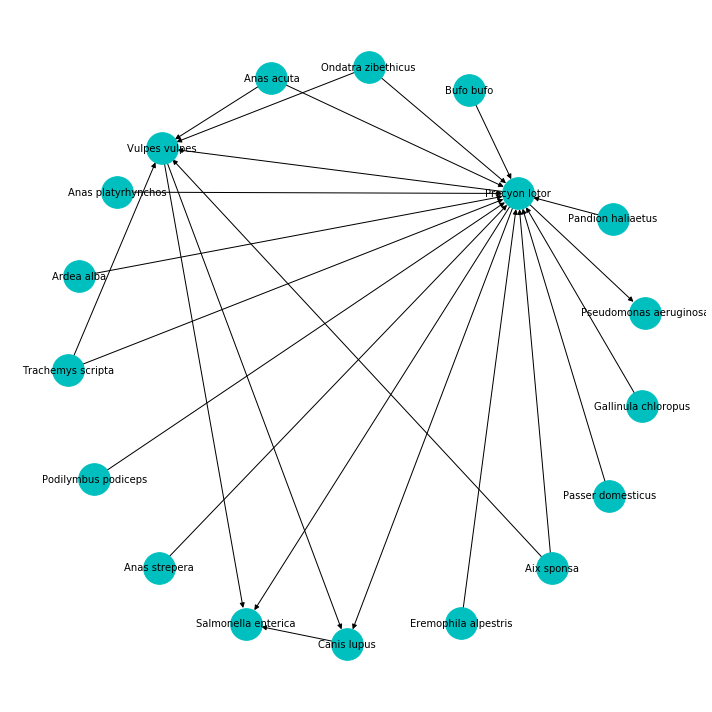

In [162]:
plt.figure(figsize=(10,10))
edge_labels = nx.get_edge_attributes(G,'label')

pos = nx.spring_layout(G, iterations=1000, k=40) 
#pos = nx.random_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.shell_layout(G, scale=1)

#nodeColors = nx.get_node_attributes(G,'color')

#nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=10, font_color='blue')

#nx.draw_networkx_nodes(G, pos, node_color=nodeColors.values())

nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='c', alpha= 1, arrows=True, 
                    linewidths=1, font_color="black", font_size=10, style = 'dashed')

plt.axis('off')
plt.tight_layout()
plt.show()

In [400]:
G.adj[0]

KeyError: 0

In [401]:
nx.degree(G)

DiDegreeView({})

In [447]:
taxaFoundInCountry

,key,species,count
0,2020591,Tingis cardui,65
1,5424258,Hyaloperonospora parasitica,35
2,2578591,Erysiphe mayorii,1
3,4291199,Rhinocyllus conicus,4
4,1183775,Larinus planus,9
5,2514802,Puccinia cnici-oleracei,18
6,2515256,Puccinia cnici,21
7,1622979,Xyphosia miliaria,8
8,1627994,Terellia tussilaginis,2
9,5263086,Ophiobolus acuminatus,39


In [464]:
taxaFoundInCountry

,key,species,count
0,2020591,Tingis cardui,65
1,5424258,Hyaloperonospora parasitica,35
2,2578591,Erysiphe mayorii,1
3,4291199,Rhinocyllus conicus,4
4,1183775,Larinus planus,9
5,2514802,Puccinia cnici-oleracei,18
6,2515256,Puccinia cnici,21
7,1622979,Xyphosia miliaria,8
8,1627994,Terellia tussilaginis,2
9,5263086,Ophiobolus acuminatus,39


In [529]:
filename = "waste.csv"
interactingTaxa.to_csv (filename, index = True, header=True) 